# IMDB dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

In [4]:
# Read the reviews (keeping only the 10,000 
# most frequent words in the train dataset)

In [5]:
(train_data,train_labels),\
(test_data,test_labels) = imdb.load_data(num_words=10000)

In [6]:
print(train_data.shape,train_labels.shape)

(25000,) (25000,)


In [7]:
print(test_data.shape,test_labels.shape)

(25000,) (25000,)


In [8]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
# number of words in first 4 reviews

print(len(train_data[0]),
    len(train_data[1]),
    len(train_data[2]),
    len(train_data[3]))

218 189 141 550


In [10]:
# show integer-encoded words of 1st review
train_data[:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

In [11]:
# show class of 1st review (0 is positive, 1 is negative)
test_labels[:1]

array([0])

### Decode a Review

In [12]:
# Word_Index is a dictionary mapping words to an integer index

In [13]:
word_index = imdb.get_word_index()

In [14]:
type(word_index)

dict

In [15]:
# to see dictionary, convert it to a list 
aux = list(word_index.items())[0:2]
dict(aux)

{'fawn': 34701, 'tsukino': 52006}

In [16]:
# reverse keys and values
[(var,key) for (key, var) in word_index.items()][0:2]

[(34701, 'fawn'), (52006, 'tsukino')]

In [17]:
reverse_word_index = dict([(var,key)\
                           for (key, var) in word_index.items()])

In [18]:
# Decode the 1st review
# Note that the indices are offset by 3 
# because 0,1,and 2 are reserved indices for "padding", 
#                  "start of sequence", and "unknown"

In [19]:
# decode 1st review
decode_review1 = ' '.join([reverse_word_index.get(i - 3, '.')\
                          for i in train_data[0]])
type(decode_review1)

str

In [20]:
string1 = decode_review1[:2000]
string1

". this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert . is an amazing actor and now the same being director . father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for . and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also . to the two little boy's that played the . of norman and paul they were just brilliant children are often left out of the . list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [21]:
# number of letters in 1st review
len(string1)

1113

In [22]:
# number of words in 1st review
len(string1.split())

218

### 2. Prepare the data - Encoding the integer sequences into a binary matrix

In [23]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [24]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [25]:
x_train.shape

(25000, 10000)

In [37]:
# display first 16 binary-encoded words from the first 10 reviews

x_train[:10,:16]

array([[0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.],
       [0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.],
       [0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [23]:
# Most reviews share same common words (i.e. this, an, is, it, was,...)

In [23]:
# transform labels from binary int64 to as float32

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 3. Build Network

In [25]:
model = keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [26]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics = ['accuracy'] )

### 4. Train the NN

In [ ]:
# Split the train data set 
# into validation and "actual train" sets

In [27]:
# set aside the validation set
x_val = x_train[:10000]
y_val = y_train[:10000]

# define the actual train set
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [28]:
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5278 - accuracy: 0.7793 - val_loss: 0.3984 - val_accuracy: 0.8682
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3115 - accuracy: 0.9021 - val_loss: 0.3059 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2230 - accuracy: 0.9263 - val_loss: 0.2922 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1782 - accuracy: 0.9396 - val_loss: 0.2940 - val_accuracy: 0.8821
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1449 - accuracy: 0.9541 - val_loss: 0.2841 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1202 - accuracy: 0.9621 - val_loss: 0.3019 - val_accuracy: 0.8822
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0993 - accuracy: 0.9702 - val_loss: 0.3080 - val_accuracy: 0.8841
Epoch 8/20
30/30 [=

The call to model.fit() returns a History object.\
This object has a member .history, which is a dictionary 
with the loss and accuracy after each epoch

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
# see the metrics in a dataframe format

In [31]:
df9 = pd.DataFrame(history_dict)
df9.index = range(1,21)
df9

,loss,accuracy,val_loss,val_accuracy
1,0.527765,0.779267,0.398358,0.8682
2,0.311463,0.902067,0.305922,0.8846
3,0.223035,0.926333,0.292163,0.8838
4,0.178237,0.939600,0.293958,0.8821
5,0.144871,0.954067,0.284090,0.8864
6,0.120199,0.962133,0.301936,0.8822
7,0.099306,0.970200,0.307970,0.8841
8,0.081178,0.977267,0.332696,0.8821
9,0.069987,0.980000,0.354571,0.8815
10,0.054642,0.985933,0.378761,0.8759


### Plot Train and Validation loss

In [32]:
df9[df9.val_loss==df9.val_loss.min()]

,loss,accuracy,val_loss,val_accuracy
5,0.144871,0.954067,0.28409,0.8864


In [33]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,21)

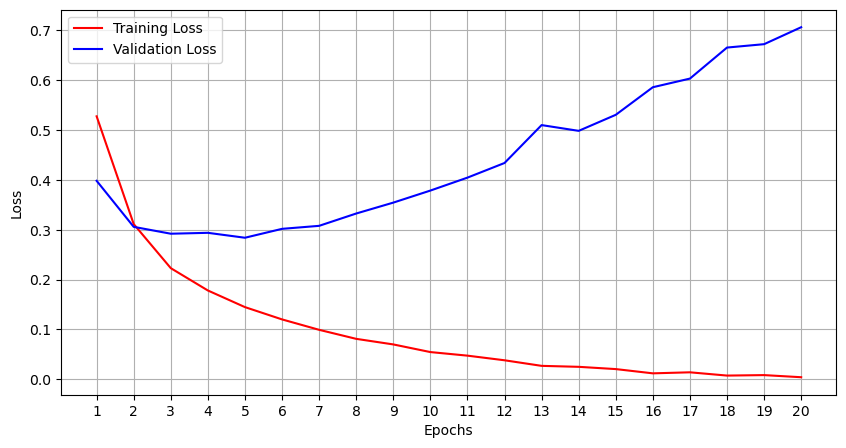

In [34]:
plt.figure(figsize=(10,5))
plt.plot(epochs,loss_values,'r',
         label='Training Loss')
plt.plot(epochs,val_loss_values,'b',
         label='Validation Loss')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

### Plot Train and Validation accuracy

In [35]:
df9[df9.val_accuracy==df9.val_accuracy.max()]

,loss,accuracy,val_loss,val_accuracy
5,0.144871,0.954067,0.28409,0.8864


In [36]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

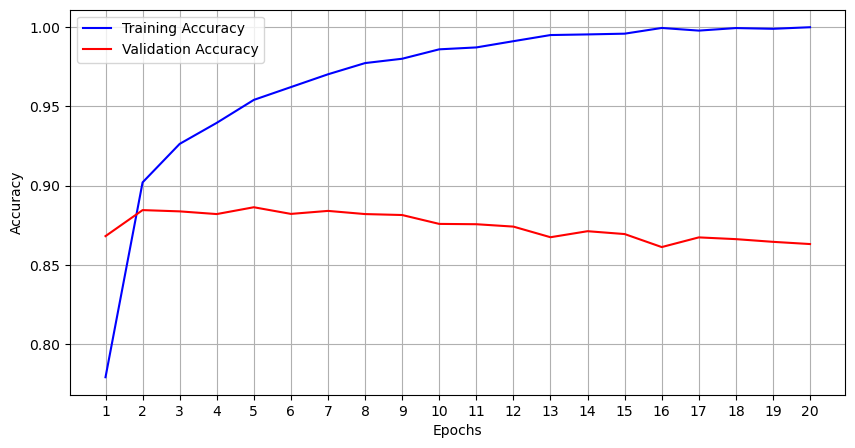

In [37]:
plt.figure(figsize=(10,5))
plt.plot(epochs,df9.accuracy,'b',
         label='Training Accuracy')
plt.plot(epochs,df9.val_accuracy,'r',
         label='Validation Accuracy')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

### Retrain the model from scratch (5 epochs)

In [38]:
model = keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [39]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'] )

In [40]:
model.fit(x_train,y_train,epochs=5,batch_size=512);

Epoch 1/5
49/49 [==============================] - 0s 4ms/step - loss: 0.4616 - accuracy: 0.8144
Epoch 2/5
49/49 [==============================] - 0s 4ms/step - loss: 0.2604 - accuracy: 0.9097
Epoch 3/5
49/49 [==============================] - 0s 4ms/step - loss: 0.2009 - accuracy: 0.9281
Epoch 4/5
49/49 [==============================] - 0s 4ms/step - loss: 0.1688 - accuracy: 0.9381
Epoch 5/5
49/49 [==============================] - 0s 4ms/step - loss: 0.1438 - accuracy: 0.9498


In [41]:
test_loss,test_acc = model.evaluate(x_test,y_test)

782/782 [==============================] - 0s 343us/step - loss: 0.3160 - accuracy: 0.8788


In [42]:
test_loss

0.3159539997577667

In [43]:
# test accuracy rate

In [44]:
test_acc

0.8787999749183655

### Prediction

In [45]:
model.predict(x_test)

782/782 [==============================] - 0s 308us/step


array([[0.12345693],
       [0.9988345 ],
       [0.70151997],
       ...,
       [0.12658685],
       [0.02984109],
       [0.6242123 ]], dtype=float32)